In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/supermarket-sales/supermarket_sales - Sheet1.csv


In [2]:
df=pd.read_csv('/kaggle/input/supermarket-sales/supermarket_sales - Sheet1.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

In [4]:
df.describe()

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000
mean,55.672130,5.510000,15.379369,322.966749,307.58738,4.761905,15.379369,6.97270
std,26.494628,2.923431,11.708825,245.885335,234.17651,0.000000,11.708825,1.71858
min,10.080000,1.000000,0.508500,10.678500,10.17000,4.761905,0.508500,4.00000
25%,32.875000,3.000000,5.924875,124.422375,118.49750,4.761905,5.924875,5.50000
50%,55.230000,5.000000,12.088000,253.848000,241.76000,4.761905,12.088000,7.00000
75%,77.935000,8.000000,22.445250,471.350250,448.90500,4.761905,22.445250,8.50000
max,99.960000,10.000000,49.650000,1042.650000,993.00000,4.761905,49.650000,10.00000


### Clean the data
### drop rows of NaN

In [5]:
nan_df =df[df.isna().any(axis =1)]
nan_df.head()

df = df.dropna(how ='all')
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


### Add month column

In [6]:
df['Month'] = pd.to_datetime(df['Date']).dt.month
df

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating,Month
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1,1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6,3
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4,3
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4,1
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,233-67-5758,C,Naypyitaw,Normal,Male,Health and beauty,40.35,1,2.0175,42.3675,1/29/2019,13:46,Ewallet,40.35,4.761905,2.0175,6.2,1
996,303-96-2227,B,Mandalay,Normal,Female,Home and lifestyle,97.38,10,48.6900,1022.4900,3/2/2019,17:16,Ewallet,973.80,4.761905,48.6900,4.4,3
997,727-02-1313,A,Yangon,Member,Male,Food and beverages,31.84,1,1.5920,33.4320,2/9/2019,13:22,Cash,31.84,4.761905,1.5920,7.7,2
998,347-56-2442,A,Yangon,Normal,Male,Home and lifestyle,65.82,1,3.2910,69.1110,2/22/2019,15:33,Cash,65.82,4.761905,3.2910,4.1,2


### Anylysing and Exploring My data

### Question 1: What was the best month for sales? How much was earned that month?

In [7]:
#group by month and cost of goods (cogs)
monthly_cogs = df.groupby('Month')['cogs'].sum()

In [8]:
monthly_cogs

Month
1    110754.16
2     92589.88
3    104243.34
Name: cogs, dtype: float64

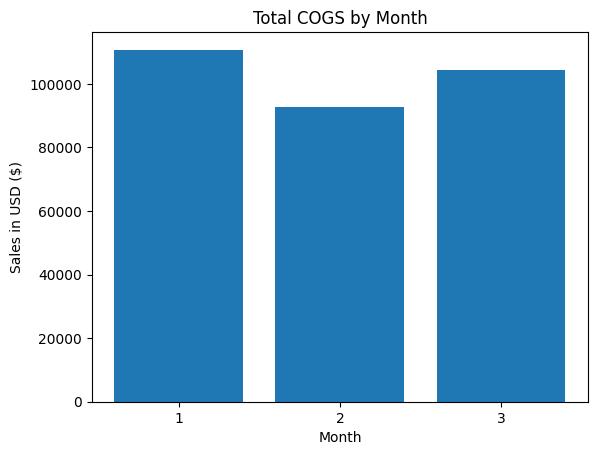

In [9]:

import matplotlib.pyplot as plt

# Define the months as a list
months = monthly_cogs.index.tolist()

# Plot the bar chart
plt.bar(months, monthly_cogs)
plt.xticks(months)
plt.ylabel('Sales in USD ($)')
plt.xlabel('Month')
plt.title('Total COGS by Month')
plt.show()


### What city sold the most product?

In [10]:
df.groupby(['City']).sum()

,Invoice ID,Branch,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating,Month
City,,,,,,,,,,,,,,,,,
Mandalay,692-92-5582351-62-0822529-56-3974299-46-180531...,BBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBB...,MemberMemberMemberMemberNormalNormalNormalNorm...,FemaleFemaleMaleFemaleFemaleMaleMaleMaleFemale...,Food and beveragesFashion accessoriesElectroni...,18478.88,1820,5057.0320,106197.6720,2/20/20192/6/20193/9/20191/15/20193/11/20193/5...,13:2718:0717:0316:1915:3010:4012:2015:3119:481...,Credit cardEwalletCashCashEwalletEwalletCredit...,101140.64,1580.952381,5057.0320,2263.6,665
Naypyitaw,226-31-3081699-14-3026315-22-5665300-71-460518...,CCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCC...,NormalNormalNormalMemberMemberMemberNormalMemb...,FemaleMaleFemaleMaleFemaleFemaleFemaleMaleFema...,Electronic accessoriesElectronic accessoriesHo...,18567.76,1831,5265.1765,110568.7065,3/8/20193/25/20192/24/20192/25/20192/6/20191/7...,10:2918:3011:3811:2410:4212:2813:2410:1120:391...,CashEwalletEwalletEwalletEwalletEwalletEwallet...,105303.53,1561.904762,5265.1765,2319.9,640
Yangon,750-67-8428631-41-3108123-19-1176373-73-791035...,AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA...,MemberNormalMemberNormalMemberMemberNormalNorm...,FemaleMaleMaleMaleFemaleFemaleFemaleMaleFemale...,Health and beautyHome and lifestyleHealth and ...,18625.49,1859,5057.1605,106200.3705,1/5/20193/3/20191/27/20192/8/20192/25/20191/10...,13:0813:2320:3310:3714:3617:1510:2516:4819:211...,EwalletCredit cardEwalletEwalletEwalletCredit ...,101143.21,1619.047619,5057.1605,2389.2,688


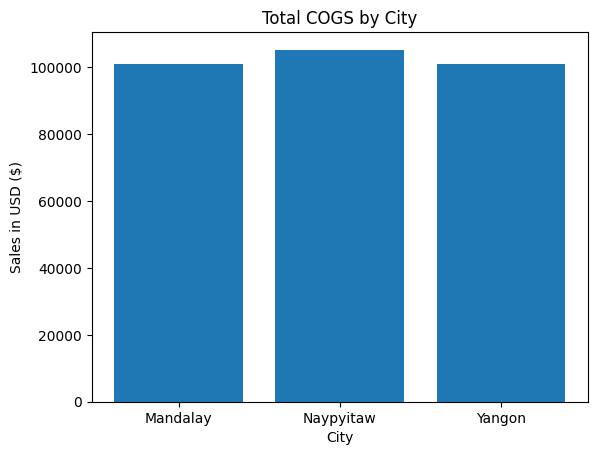

In [11]:
# Group the data by city and sum the 'cogs' for each city
city_cogs_sum = df.groupby('City')['cogs'].sum()

# Extract the city names and their corresponding total COGS
cities = city_cogs_sum.index.tolist()
cogs_totals = city_cogs_sum.values.tolist()

# Plot the bar chart
plt.bar(cities, cogs_totals)
plt.ylabel('Sales in USD ($)')
plt.xlabel('City')
plt.title('Total COGS by City')
plt.show()


### Best time to advertise

In [12]:
# Add hour column
df['Hour'] = pd.to_datetime(df['Time']).dt.hour
df['Minute'] = pd.to_datetime(df['Time']).dt.minute
df['Count'] = 1
df.head()


/tmp/ipykernel_18/1181856042.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Hour'] = pd.to_datetime(df['Time']).dt.hour
/tmp/ipykernel_18/1181856042.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Minute'] = pd.to_datetime(df['Time']).dt.minute


,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,...,Time,Payment,cogs,gross margin percentage,gross income,Rating,Month,Hour,Minute,Count
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,...,13:08,Ewallet,522.83,4.761905,26.1415,9.1,1,13,8,1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,...,10:29,Cash,76.40,4.761905,3.8200,9.6,3,10,29,1
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,...,13:23,Credit card,324.31,4.761905,16.2155,7.4,3,13,23,1
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,...,20:33,Ewallet,465.76,4.761905,23.2880,8.4,1,20,33,1
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,...,10:37,Ewallet,604.17,4.761905,30.2085,5.3,2,10,37,1


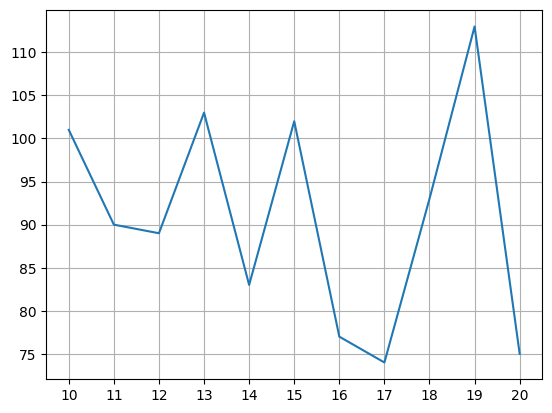

In [13]:
keys = [pair for pair, df in df.groupby(['Hour'])]

# Extract the first element of each tuple in 'keys'
hours = [pair[0] for pair in keys]

plt.plot(keys, df.groupby(['Hour']).count()['Count'])
plt.xticks(hours)  # Set the tick locations for the x-axis
plt.grid()
plt.show()



### Most purchased products

In [14]:
df

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,...,Time,Payment,cogs,gross margin percentage,gross income,Rating,Month,Hour,Minute,Count
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,...,13:08,Ewallet,522.83,4.761905,26.1415,9.1,1,13,8,1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,...,10:29,Cash,76.40,4.761905,3.8200,9.6,3,10,29,1
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,...,13:23,Credit card,324.31,4.761905,16.2155,7.4,3,13,23,1
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,...,20:33,Ewallet,465.76,4.761905,23.2880,8.4,1,20,33,1
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,...,10:37,Ewallet,604.17,4.761905,30.2085,5.3,2,10,37,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,233-67-5758,C,Naypyitaw,Normal,Male,Health and beauty,40.35,1,2.0175,42.3675,...,13:46,Ewallet,40.35,4.761905,2.0175,6.2,1,13,46,1
996,303-96-2227,B,Mandalay,Normal,Female,Home and lifestyle,97.38,10,48.6900,1022.4900,...,17:16,Ewallet,973.80,4.761905,48.6900,4.4,3,17,16,1
997,727-02-1313,A,Yangon,Member,Male,Food and beverages,31.84,1,1.5920,33.4320,...,13:22,Cash,31.84,4.761905,1.5920,7.7,2,13,22,1
998,347-56-2442,A,Yangon,Normal,Male,Home and lifestyle,65.82,1,3.2910,69.1110,...,15:33,Cash,65.82,4.761905,3.2910,4.1,2,15,33,1


In [15]:
df_2 = df[df['Invoice ID'].duplicated(keep=False)]
df_2['Grouped'] = df_2.groupby('Invoice ID')['Product line'].transform(lambda x: ','.join(x))
df_3 = df_2[['Invoice ID', 'Grouped']].drop_duplicates()


In [16]:
count = Counter()

for row in df_3['Grouped']:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list, 2)))

for key,value in count.most_common():
    print(key, value)

print("Number of combinations found:", len(count))



NameError: name 'Counter' is not defined

In [ ]:
print(df_3['Grouped'])

In [ ]:
# Group the data by 'Product line' and count the occurrences of each product line
product_counts = df.groupby('Product line').size().reset_index(name='Count')

# Display the grouped data
print(product_counts)


### What product sold the most?

In [ ]:
product_group = df.groupby('Product line')
quantity_ordered = product_group.sum()['Quantity']

keys = [pair for pair, df in product_group]
plt.bar(keys, quantity_ordered)
plt.xticks(keys, rotation='vertical', size=8)
plt.show()

In [ ]:
# prices = df.groupby('Product line').mean()['unique_price']

# fig, ax1 = plt.subplots()

# ax2 = ax1.twinx()
# ax1.bar(keys, quantity_ordered, color='g')
# ax2.plot(keys, prices, color='b')

# ax1.set_xlabel('Product Name')
# ax1.set_ylabel('Quantity Ordered', color='g')
# ax2.set_ylabel('Price ($)', color='b')
# ax1.set_xticklabels(keys, rotation='vertical', size=8)

# fig.show()

### Grouping by gender

In [ ]:
# Group the data by both 'Gender' and 'Product line' and count the occurrences of each combination
gender_product_counts = df.groupby(['Gender', 'Product line']).size().reset_index(name='Count')

# Display the grouped data
unique_price = print(gender_product_counts)


In [ ]:

#import seaborn as sns
import matplotlib.pyplot as plt

# Set the figure size
plt.figure(figsize=(10, 6))

# Plot the bar graph
sns.barplot(x='Product line', y='Count', hue='Gender', data=gender_product_counts)

# Set the axis labels and title
plt.xlabel('Product Line')
plt.ylabel('Count')
plt.title('Count of Product Lines by Gender')

# Rotate the x-axis labels for better readability
plt.xticks(rotation=45)

# Show the plot
plt.tight_layout()
plt.show()


### Relationship between Cost of goods, gross margin percentage and gross income

In [ ]:
import seaborn as sns
columns_of_interest = ['cogs', 'gross margin percentage', 'gross income', 'Product line']
sns.pairplot(df[columns_of_interest])
plt.show()


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
columns_of_interest = ['cogs', 'gross margin percentage', 'gross income']
correlation_matrix = df[columns_of_interest].corr()
sns.heatmap(correlation_matrix)
plt.title('Corr of COGS, GMP and GI')
plt.show()
